In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
data=pd.read_csv('C:/Users/turki/Documents/adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.shape

(48842, 15)

In [4]:
data['income']=data['income'].map({'<=50K':0, '>50K':1})

In [5]:
data['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [6]:
data['workclass']=data['workclass'].str.replace('?', 'Private')

In [7]:
data['native-country']=data['native-country'].str.replace('?', 'United-States')

In [8]:
data['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [9]:
data['occupation']=data['occupation'].replace('?', 'Prof-specialty')

In [10]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [21]:

data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [12]:
data.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


# Relationship Analysis

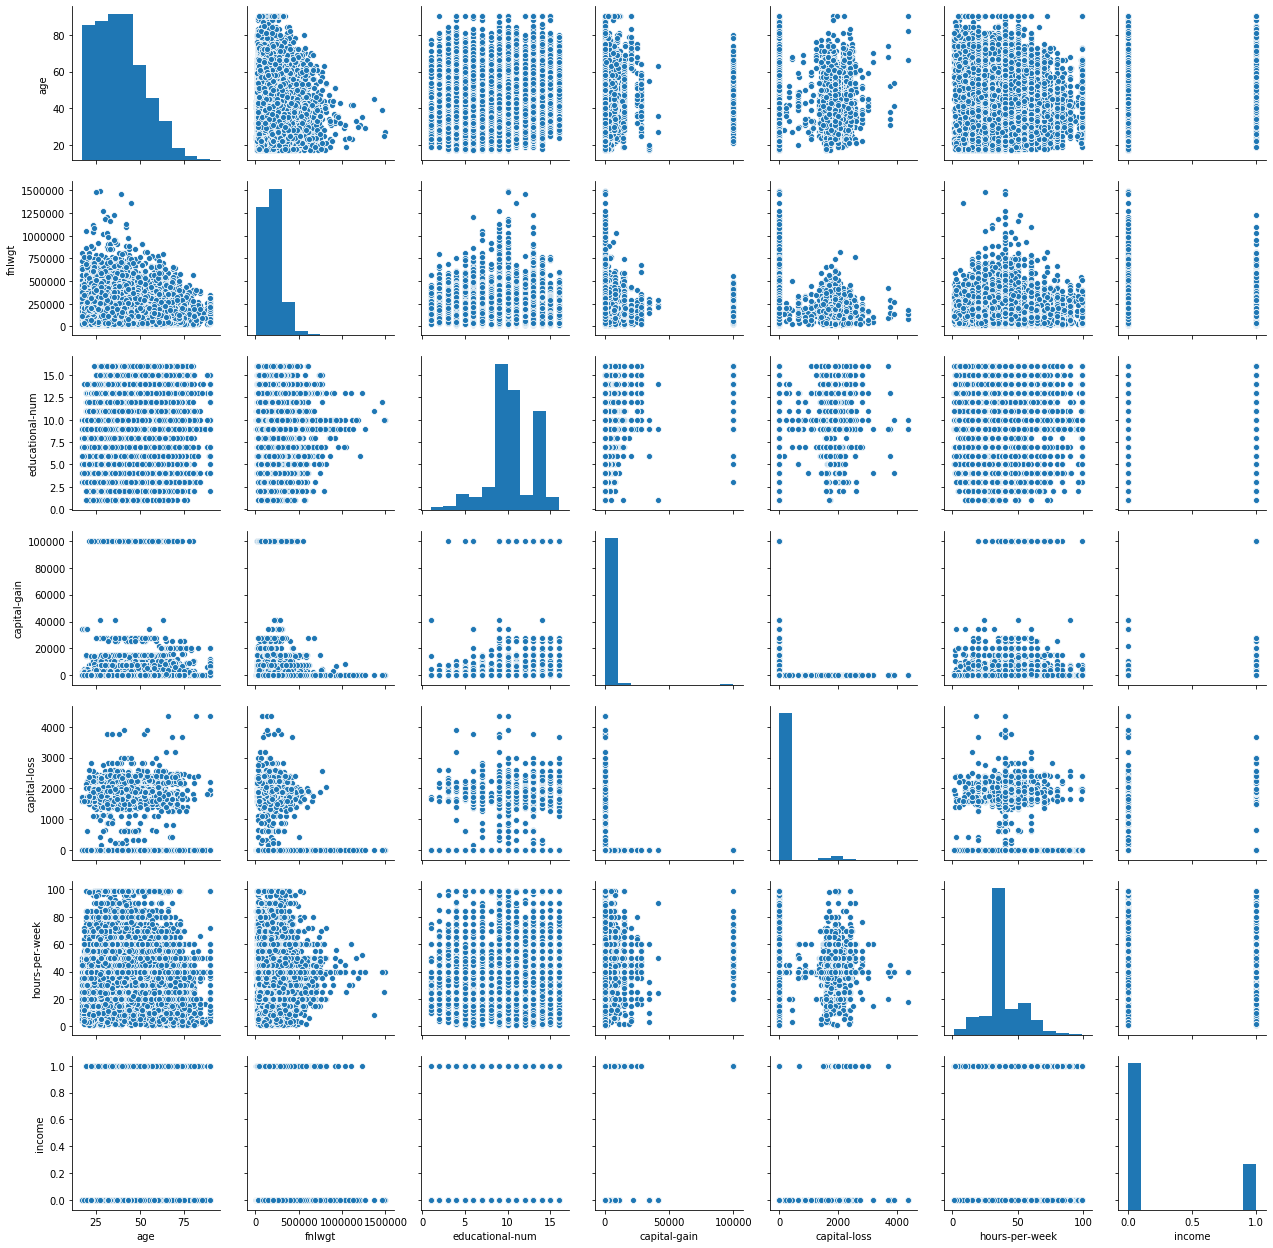

In [13]:
sns.pairplot(data)

What is the education level profile for each sector? 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text yticklabel objects>)

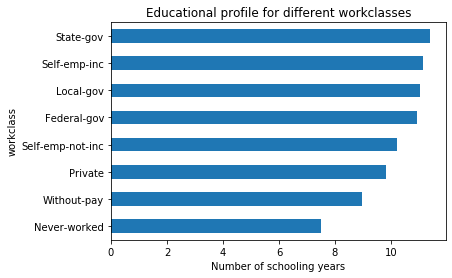

In [14]:
data.groupby('workclass')['educational-num'].mean().sort_values().plot(kind='barh')
plt.xlabel('Number of schooling years')
plt.title('Educational profile for different workclasses')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

At first glance, it seems that education level of those performing government jobs is higher, in general

How much do workers make in each sector? 

Text(0.5, 1.0, 'Income Distribution in Different Workclasses')

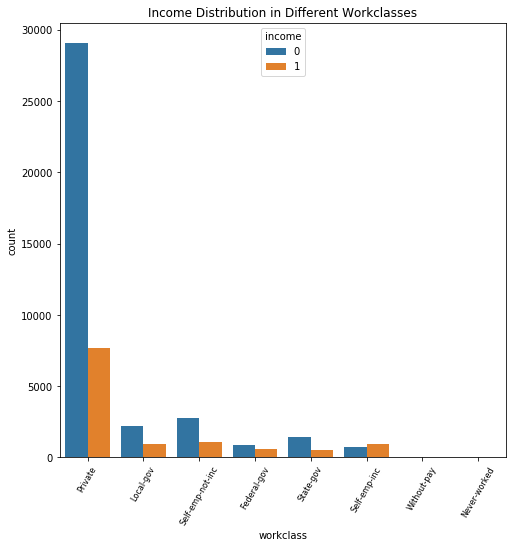

In [15]:
plt.figure(figsize=(8,8))
sns.countplot('workclass',hue='income', data=data)
plt.xticks(fontsize=8, rotation=60)
plt.title('Income Distribution in Different Workclasses')

People that for in private sector has the majority in the data. We see that the salaries are lower than 50k most of the time in private sector. Overall, salaries are lower than 50K in all sectors. for self-employed group, the number of people that make more than 50K is slighlty higher than those that make less than 50K.  

Sector Distribution

Text(0.5, 1.0, 'Workclass Distribution')

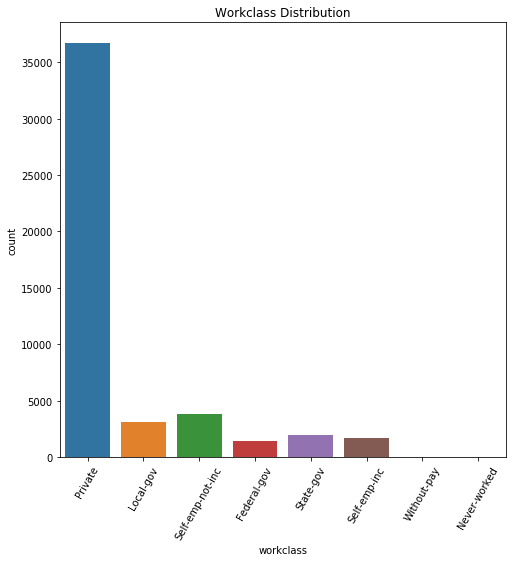

In [16]:
plt.figure(figsize=(8,8))
sns.countplot('workclass',data=data)
plt.xticks(fontsize=10, rotation=60)
plt.title('Workclass Distribution')

Most of the poeple in the dataset are in private sector followed by self-employed. 

Does education level make a difference? 

Text(0.5, 1.0, 'Income Distribution based on different education levels')

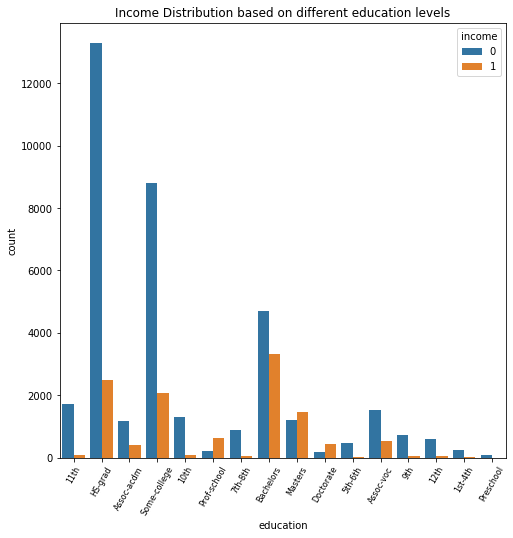

In [17]:
plt.figure(figsize=(8,8))
sns.countplot('education',hue='income', data=data)
plt.xticks(fontsize=8, rotation=60)
plt.title('Income Distribution based on different education levels')

High school graduates make less than 50K mostly. We observe the same pattern for people with some college education.

Number of people with a master degree that earns more than 50K is slighlty higher than that of those who earn less than 50K.

We see the same for people with a PhD degree. 

Proffesional school gradutes make more than 50K generally. 

Income gap per occupation

Text(0.5, 1.0, 'Income Distribution for different occupations')

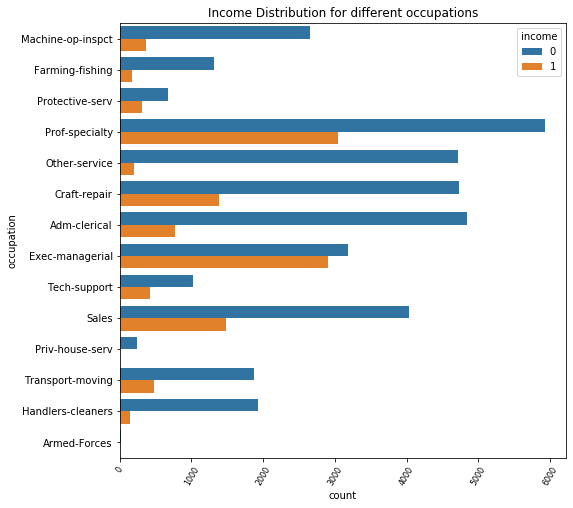

In [18]:
plt.figure(figsize=(8,8))
sns.countplot(y='occupation',hue='income', data=data)
plt.xticks(fontsize=8, rotation=60)
plt.title('Income Distribution for different occupations')

Overall, for each occupation, number of people that earn less than 50K is higher than that of people that earn more than 50K. It would be more accurate to answer the same question for each state as the pay scale differs from state to state. 

In [ ]:
Do marital status and gender make a difference on earning?

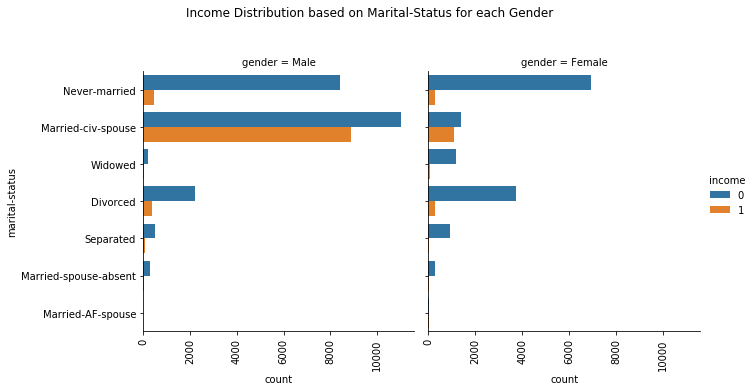

In [17]:
x=sns.catplot(y='marital-status', hue='income', col='gender', kind='count',data=data)
plt.subplots_adjust(top=0.8) 
x.fig.suptitle('Income Distribution based on Marital-Status for each Gender')
x.set_xticklabels(rotation=90)


In [ ]:
1. Number of Males who never married and earn less than 50K is higher than that of females

2. Number of married males that make more than 50K is significantly higher than married females that make more than 50K.

3. Number of divorced females that earn less than 50K is higher than the number of divorced males that earn less than 50K



Race and Gender effect on Income

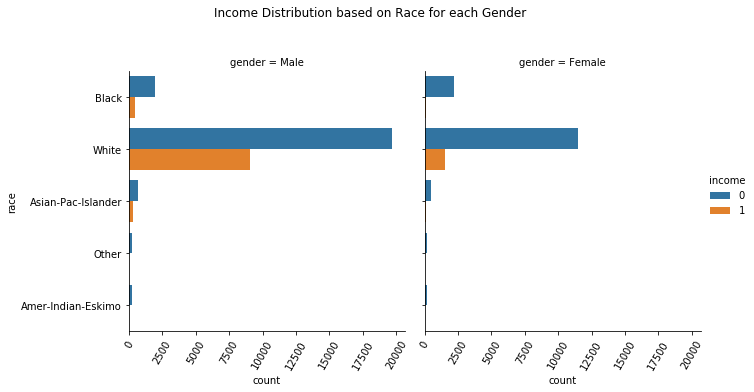

In [18]:
x=sns.catplot(y='race', hue='income', col='gender', kind='count',data=data)
plt.subplots_adjust(top=0.8) 
x.fig.suptitle('Income Distribution based on Race for each Gender')
x.set_xticklabels(rotation=60)

Number of black males that earn less than 50K is significantly lower than the number of white males that earn less than 50K. We believe that all the results that obtained based on the current dataset for race would be misleading as the data is highly imbalanced. i.e. 80% of the dataset is on white race.  

Is there a income gap between genders? 

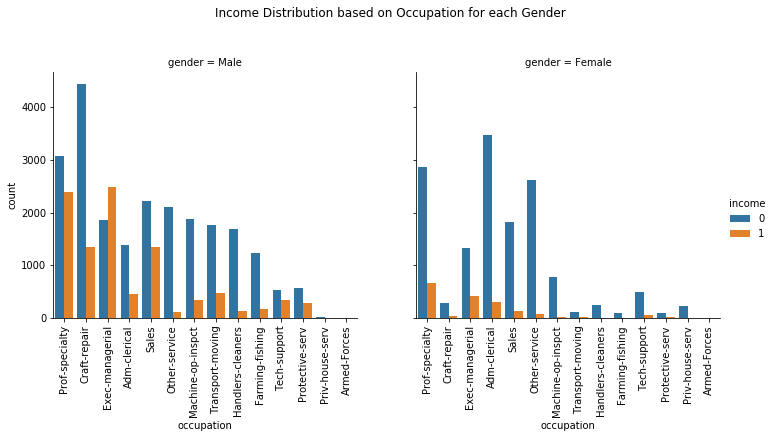

In [119]:
x=sns.catplot(col='gender', hue='income', x='occupation', kind='count',order=data['occupation'].value_counts().index,data=data)
plt.subplots_adjust(top=0.8) 
x.fig.suptitle('Income Distribution based on Occupation for each Gender')
x.set_xticklabels(rotation=90)

1. The Number of males that earn more than 50K in prof-specialty is significantly higher than the number of females in the same proffesion.

2. Number of females in Admin-Clerical positions is significantly higher than the number of males. 

3. The number of males that earn more than 50K in executive-managerial positons is higher than the that of males that earn less than 50K in the same profession. 

In [ ]:
Race Distribution 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

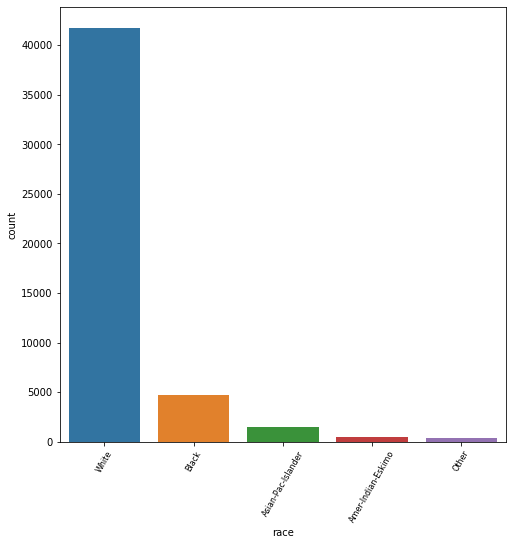

In [138]:
plt.figure(figsize=(8,8))
sns.countplot('race', order=data['race'].value_counts().index,data=data)
plt.xticks(fontsize=8, rotation=60)
plt.title('Race Distribution')

In [ ]:
As we can see on the graph above that the dataset includes white race mostly followed by African-American race. 

Age vs. Income for each gender

Text(0.5, 1.0, 'Age Distribution with respect to income and Gender')

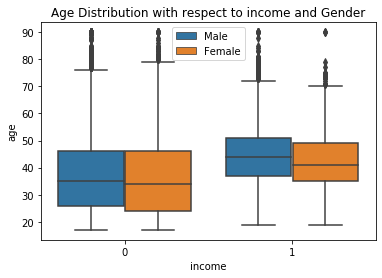

In [124]:
sns.boxplot(x='income', y='age', hue='gender', data=data)
plt.legend(loc='best')
plt.title('Age Distribution with respect to income and Gender')

In [ ]:
1. The age distribution is almost identical for males and females that earn less than 50K. 

2. For those who make more than 50K , median age for males is slighlty higher than females. 

Number of Work Hours vs. Income based on Gender 

Text(0.5, 1.0, 'Number of Work Hours based on Income and Gender')

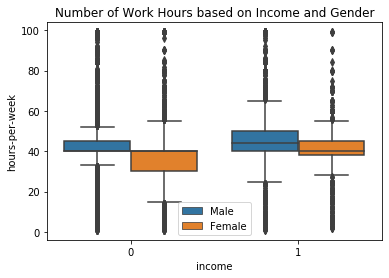

In [125]:
sns.boxplot(x='income', y='hours-per-week', hue='gender', data=data)
plt.legend(loc='best')
plt.title('Number of Work Hours based on Income and Gender')

1. For those who make less than 50K, males work longer than females per week. 

2. We see the same pattern for those that earn more than 50K. That is , males hold more work hours than females. 

Age vs. Income

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Age vs. Income Level')

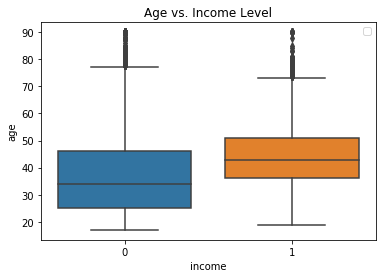

In [128]:
sns.boxplot(x='income', y='age', data=data)
plt.legend(loc='best')
plt.title('Age vs. Income Level')

People that earn more than 50K are generally older than people that earn less than 50K. 

In [58]:
data.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


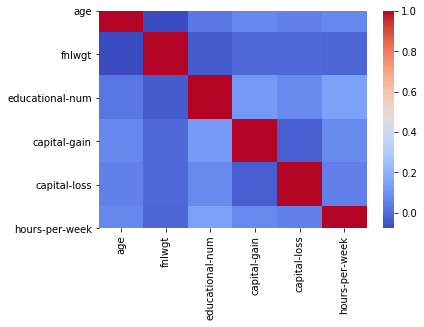

In [60]:
sns.heatmap(data.corr(), cmap='coolwarm')

We do not observe any significant correlation between the variables. 

In [15]:
from scipy.stats import ttest_ind

Ho: Age and income are independent 
H1: Age and Income are dependent 

In [19]:
#age vs income
below_50K=data[data['income']==0]['age']
below_50K.shape

(37155,)

In [21]:
above_50K=data[data['income']==1]['age']
above_50K.shape

(11687,)

In [22]:
ttest,pval = ttest_ind(above_50K, below_50K,equal_var = False)
print("ttest",ttest)
print('p value',pval)

ttest 60.66031699711951
p value 0.0


In [ ]:
We reject the null that age and income are independent. I.e. age has some affect on income. 

# Chi-square test of independence

In [ ]:
Income vs. Workclass

In [32]:
wc_income=pd.crosstab(data['workclass'], data['income'], margins=False)
wc_income

income,0,1
workclass,,
Federal-gov,871,561
Local-gov,2209,927
Never-worked,10,0
Private,29053,7652
Self-emp-inc,757,938
Self-emp-not-inc,2785,1077
State-gov,1451,530
Without-pay,19,2


In [34]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Workclass vs. Income
stat, p, dof, expected = chi2_contingency(wc_income)
print('dof=%d' % dof)
print('p_value', p)


dof=7
p_value 4.241101689036193e-297


We reject the null hypothesis that the income and workclass are independent. 

Education vs. Income

In [35]:
edu_income=pd.crosstab(data['education'], data['income'], margins=False)

In [36]:
# education level vs. income
stat, p, dof, expected = chi2_contingency(edu_income)
print('dof=%d' % dof)
print('p_value', p)

dof=15
p_value 0.0


Education level and income are not independent. 

In [ ]:
Race vs. Income 

In [38]:
race_income=pd.crosstab(data['race'], data['income'], margins=False)

In [39]:
# Race vs. Income 
stat, p, dof, expected = chi2_contingency(race_income)
print('dof=%d' % dof)
print('p_value', p)

dof=4
p_value 4.284377710223499e-104


Race and income are not independent

Gender vs. Income 

In [40]:
gender_income=pd.crosstab(data['gender'], data['income'], margins=False)

In [41]:
# Gender vs. Income 
stat, p, dof, expected = chi2_contingency(gender_income)
print('dof=%d' % dof)
print('p_value', p)

dof=1
p_value 0.0


Gender and income are not independent 

In [ ]:
Marital Status vs. Income 

In [43]:
marital_status_income=pd.crosstab(data['marital-status'], data['income'], margins=False)

In [44]:
# Marital status vs. Income 
stat, p, dof, expected = chi2_contingency(marital_status_income)
print('dof=%d' % dof)
print('p_value', p)

dof=6
p_value 0.0


In [ ]:
Marital Status and income are not independent 

One should be very carefull with the results that are obtained based on the dataset in hand as it is highly imbalanced. We suggest that more data should be collected on the underpresented groups to make the data more balanced. 